# Tecnical features, loading data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Project/dataset/train.csv')
df.head() 

,SITE_ID,DATE,CELL_TYPE_Macro,CELL_TYPE_Mobil,CELL_TYPE_TRP,CELL_TYPE_Tx site,CELL_TYPE_micro,N_TRANSPORTED_SITES,GEOGRAPHIC_CLUSTER_K_0,GEOGRAPHIC_CLUSTER_K_1,GEOGRAPHIC_CLUSTER_K_2,GEOGRAPHIC_CLUSTER_K_3,GEOGRAPHIC_CLUSTER_K_4,GEOGRAPHIC_CLUSTER_K_5,GEOGRAPHIC_CLUSTER_K_6,GEOGRAPHIC_CLUSTER_K_7,GEOGRAPHIC_CLUSTER_K_8,GEOGRAPHIC_CLUSTER_K_9,aircon_sum_wo_prev7d,aircon_sum_wo_prev14d,aircon_sum_target_next14d,mean_temperature_prev7d,max_temperature_prev7d,min_temperature_prev7d,mean_temperature_prev3d,max_temperature_prev3d,min_temperature_prev3d,mean_rain_mm_prev7d,max_rain_mm_prev7d,min_rain_mm_prev7d,mean_rain_mm_prev3d,max_rain_mm_prev3d,min_rain_mm_prev3d,mean_humidity_prev7d,max_humidity_prev7d,min_humidity_prev7d,mean_humidity_prev3d,max_humidity_prev3d,min_humidity_prev3d,mean_wind_speed_prev7d,...,equipment_max_persistance_prev7d,equipment_mean_persistance_prev7d,equipment_min_persistance_prev7d,fire/smoke_max_persistance_prev7d,fire/smoke_mean_persistance_prev7d,fire/smoke_min_persistance_prev7d,ge_max_persistance_prev7d,ge_mean_persistance_prev7d,ge_min_persistance_prev7d,power_max_persistance_prev7d,power_mean_persistance_prev7d,power_min_persistance_prev7d,temperature_max_persistance_prev7d,temperature_mean_persistance_prev7d,temperature_min_persistance_prev7d,equipment_max_persistance_prev3d,equipment_mean_persistance_prev3d,equipment_min_persistance_prev3d,fire/smoke_max_persistance_prev3d,fire/smoke_mean_persistance_prev3d,fire/smoke_min_persistance_prev3d,ge_max_persistance_prev3d,ge_mean_persistance_prev3d,ge_min_persistance_prev3d,power_max_persistance_prev3d,power_mean_persistance_prev3d,power_min_persistance_prev3d,temperature_max_persistance_prev3d,temperature_mean_persistance_prev3d,temperature_min_persistance_prev3d,skew_equipment_alarms_prev14d,skew_fire/smoke_alarms_prev14d,skew_ge_alarms_prev14d,skew_power_alarms_prev14d,skew_temperature_alarms_prev14d,kurt_equipment_alarms_prev14d,kurt_fire/smoke_alarms_prev14d,kurt_ge_alarms_prev14d,kurt_power_alarms_prev14d,kurt_temperature_alarms_prev14d
0,146,2019-04-10,1,0,0,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0,10.29,14.0,6.0,12.00,14.0,9.0,1.33,8.5,0.0,3.10,8.5,0.3,62.71,81.0,45.0,70.67,81.0,58.0,11.43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.212308,-1.212308,-1.212308,-1.212308,-1.212308
1,146,2019-04-11,1,0,0,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0,11.71,16.0,9.0,13.00,16.0,9.0,1.90,8.5,0.0,4.27,8.5,0.3,66.43,81.0,51.0,75.00,81.0,71.0,11.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.212308,-1.212308,-1.212308,-1.212308,-1.212308
2,146,2019-04-12,1,0,0,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0,11.57,16.0,9.0,13.00,16.0,9.0,4.70,19.6,0.0,7.97,19.6,0.3,71.71,88.0,58.0,77.33,88.0,71.0,11.71,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.212308,-1.212308,-1.212308,-1.212308,-1.212308
3,146,2019-04-13,1,0,0,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0,11.29,16.0,8.0,11.00,16.0,8.0,4.77,19.6,0.0,8.03,19.6,0.5,74.29,88.0,58.0,80.33,88.0,71.0,11.43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.212308,-1.212308,-1.212308,-1.212308,-1.212308
4,146,2019-04-14,1,0,0,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0,10.57,16.0,5.0,7.33,9.0,5.0,5.39,19.6,0.3,8.13,19.6,0.5,77.29,88.0,58.0,86.00,88.0,82.0,10.86,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.212308,-1.212308,-1.212308,-1.212308,-1.212308


In [ ]:
cat = ['equipment_', 'fire/smoke_', 'ge_', 'power_', 'temperature_']

In [7]:
for col_name in df.columns: 
    print(col_name)

SITE_ID
DATE
CELL_TYPE_Macro
CELL_TYPE_Mobil
CELL_TYPE_TRP
CELL_TYPE_Tx site
CELL_TYPE_micro
N_TRANSPORTED_SITES
GEOGRAPHIC_CLUSTER_K_0
GEOGRAPHIC_CLUSTER_K_1
GEOGRAPHIC_CLUSTER_K_2
GEOGRAPHIC_CLUSTER_K_3
GEOGRAPHIC_CLUSTER_K_4
GEOGRAPHIC_CLUSTER_K_5
GEOGRAPHIC_CLUSTER_K_6
GEOGRAPHIC_CLUSTER_K_7
GEOGRAPHIC_CLUSTER_K_8
GEOGRAPHIC_CLUSTER_K_9
aircon_sum_wo_prev7d
aircon_sum_wo_prev14d
aircon_sum_target_next14d
mean_temperature_prev7d
max_temperature_prev7d
min_temperature_prev7d
mean_temperature_prev3d
max_temperature_prev3d
min_temperature_prev3d
mean_rain_mm_prev7d
max_rain_mm_prev7d
min_rain_mm_prev7d
mean_rain_mm_prev3d
max_rain_mm_prev3d
min_rain_mm_prev3d
mean_humidity_prev7d
max_humidity_prev7d
min_humidity_prev7d
mean_humidity_prev3d
max_humidity_prev3d
min_humidity_prev3d
mean_wind_speed_prev7d
max_wind_speed_prev7d
min_wind_speed_prev7d
mean_wind_speed_prev3d
max_wind_speed_prev3d
min_wind_speed_prev3d
mean_pressure_prev7d
max_pressure_prev7d
min_pressure_prev7d
mean_pressure_p

In [ ]:
df_tecnical = df[[col for col in df.columns if '_persistance_' in col or '_alarms_' in col]]
df_tecnical.head()

,equipment_sum_alarms_prev14d,fire/smoke_sum_alarms_prev14d,ge_sum_alarms_prev14d,power_sum_alarms_prev14d,temperature_sum_alarms_prev14d,equipment_sum_alarms_prev7d,fire/smoke_sum_alarms_prev7d,ge_sum_alarms_prev7d,power_sum_alarms_prev7d,temperature_sum_alarms_prev7d,equipment_sum_alarms_prev3d,fire/smoke_sum_alarms_prev3d,ge_sum_alarms_prev3d,power_sum_alarms_prev3d,temperature_sum_alarms_prev3d,equipment_max_persistance_prev7d,equipment_mean_persistance_prev7d,equipment_min_persistance_prev7d,fire/smoke_max_persistance_prev7d,fire/smoke_mean_persistance_prev7d,fire/smoke_min_persistance_prev7d,ge_max_persistance_prev7d,ge_mean_persistance_prev7d,ge_min_persistance_prev7d,power_max_persistance_prev7d,power_mean_persistance_prev7d,power_min_persistance_prev7d,temperature_max_persistance_prev7d,temperature_mean_persistance_prev7d,temperature_min_persistance_prev7d,equipment_max_persistance_prev3d,equipment_mean_persistance_prev3d,equipment_min_persistance_prev3d,fire/smoke_max_persistance_prev3d,fire/smoke_mean_persistance_prev3d,fire/smoke_min_persistance_prev3d,ge_max_persistance_prev3d,ge_mean_persistance_prev3d,ge_min_persistance_prev3d,power_max_persistance_prev3d,power_mean_persistance_prev3d,power_min_persistance_prev3d,temperature_max_persistance_prev3d,temperature_mean_persistance_prev3d,temperature_min_persistance_prev3d,skew_equipment_alarms_prev14d,skew_fire/smoke_alarms_prev14d,skew_ge_alarms_prev14d,skew_power_alarms_prev14d,skew_temperature_alarms_prev14d,kurt_equipment_alarms_prev14d,kurt_fire/smoke_alarms_prev14d,kurt_ge_alarms_prev14d,kurt_power_alarms_prev14d,kurt_temperature_alarms_prev14d
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.212308,-1.212308,-1.212308,-1.212308,-1.212308
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.212308,-1.212308,-1.212308,-1.212308,-1.212308
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.212308,-1.212308,-1.212308,-1.212308,-1.212308
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.212308,-1.212308,-1.212308,-1.212308,-1.212308
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.212308,-1.212308,-1.212308,-1.212308,-1.212308


#Correlation of category

Checking the correlation between all the features refer to a category

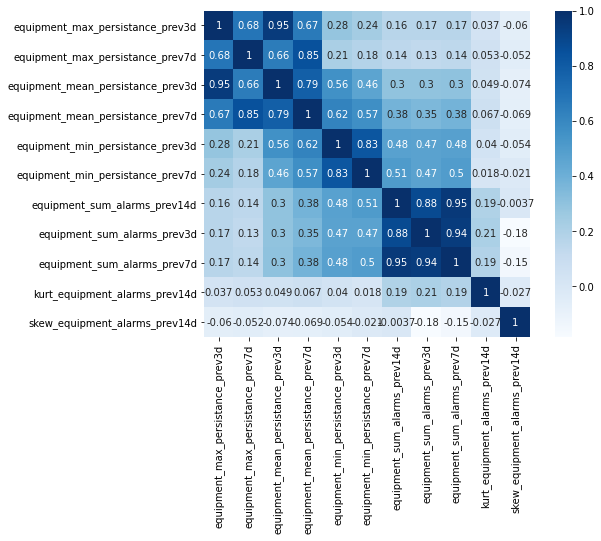

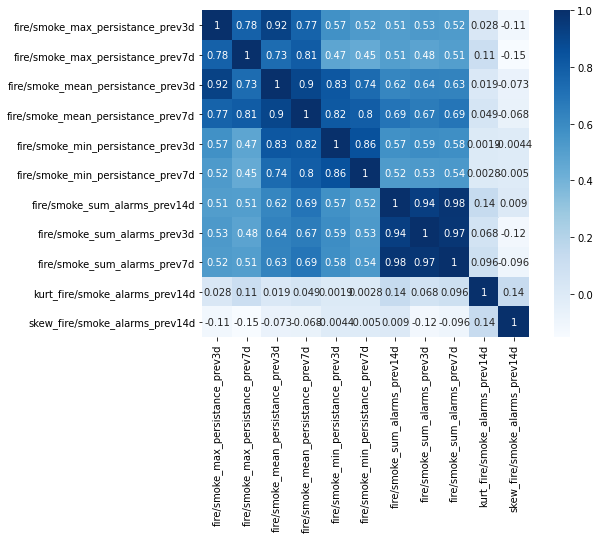

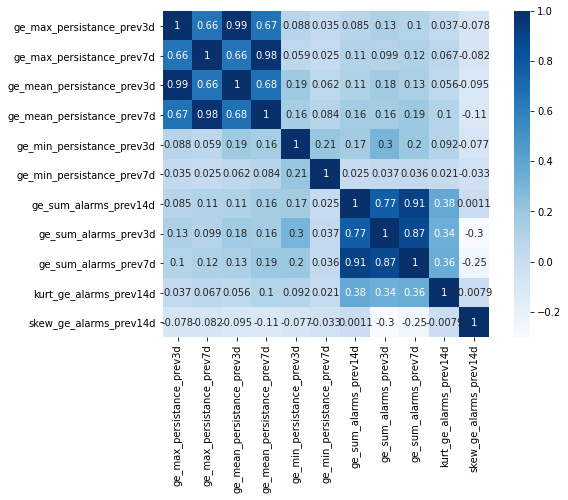

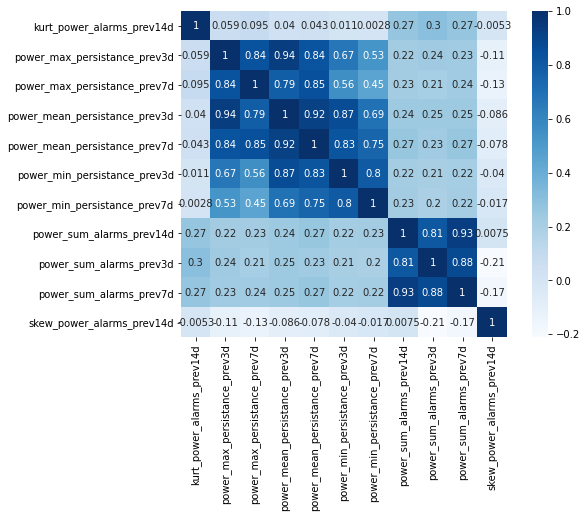

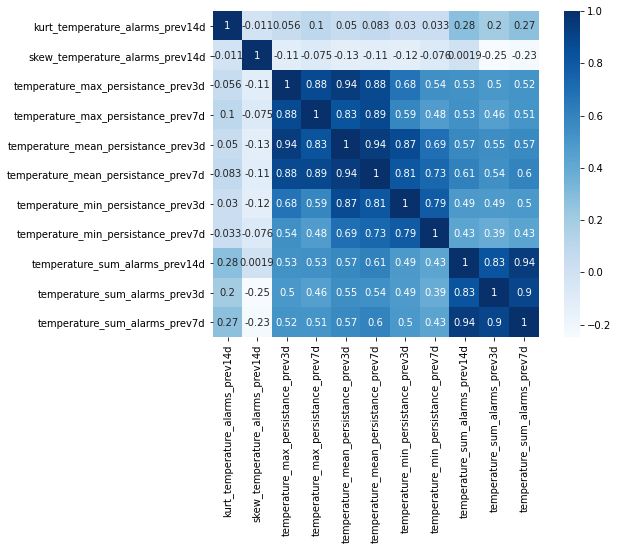

In [ ]:
for alarm in cat:
  df_alarm = df_tecnical[[col for col in df_tecnical.columns if alarm in col]]
  df_alarm = df_alarm.reindex(sorted(df_alarm.columns), axis=1) 
  plt.figure(figsize=(9,6))
  sns.heatmap(df_alarm.corr(), square=True, annot=True, cmap='Blues')

# Only equipment_sum_alarms_prev14d

Just a plot for a single feature to see what we are managing 

In [ ]:
df_equipment_sum_alarms_prev14d = df[['SITE_ID','DATE','equipment_sum_alarms_prev14d']]
df_equipment_sum_alarms_prev14d.head()

,SITE_ID,DATE,equipment_sum_alarms_prev14d
0,146,2019-04-10,0.0
1,146,2019-04-11,0.0
2,146,2019-04-12,0.0
3,146,2019-04-13,0.0
4,146,2019-04-14,0.0


In [ ]:
unique_SITE_ID = list(df_equipment_sum_alarms_prev14d['SITE_ID'].dropna().unique())

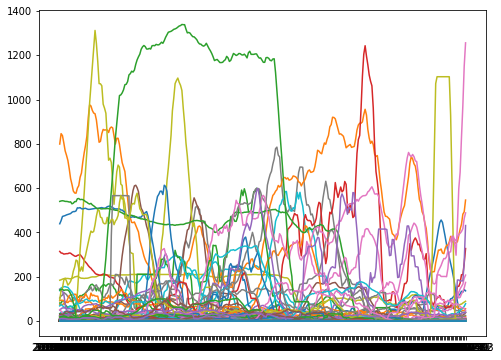

In [ ]:
plt.figure(figsize=(8,6))

for v in unique_SITE_ID:  
  plt.plot(df_equipment_sum_alarms_prev14d[df_equipment_sum_alarms_prev14d['SITE_ID']==v]['DATE'], df_equipment_sum_alarms_prev14d[df_equipment_sum_alarms_prev14d['SITE_ID']==v]['equipment_sum_alarms_prev14d'] )

  #df_equipment_sum_alarms_prev14d[df_equipment_sum_alarms_prev14d['equipment_sum_alarms_prev14d']>1000]

#SUM_ALARMS features

We check correlation in the sum_alarms features

In [ ]:
#df_sum_alarms = df[[col for col in df.columns if '_sum_alarms_' in col]]
#df_sum_alarms = df_sum_alarms.reindex(sorted(df_sum_alarms.columns), axis=1)
df_sum_alarms = df[['equipment_sum_alarms_prev14d','equipment_sum_alarms_prev7d','equipment_sum_alarms_prev3d','fire/smoke_sum_alarms_prev14d','fire/smoke_sum_alarms_prev7d','fire/smoke_sum_alarms_prev3d','ge_sum_alarms_prev14d','ge_sum_alarms_prev7d','ge_sum_alarms_prev3d','power_sum_alarms_prev14d','power_sum_alarms_prev7d','power_sum_alarms_prev3d','temperature_sum_alarms_prev14d','temperature_sum_alarms_prev7d','temperature_sum_alarms_prev3d']]
df_sum_alarms.head()

,equipment_sum_alarms_prev14d,equipment_sum_alarms_prev7d,equipment_sum_alarms_prev3d,fire/smoke_sum_alarms_prev14d,fire/smoke_sum_alarms_prev7d,fire/smoke_sum_alarms_prev3d,ge_sum_alarms_prev14d,ge_sum_alarms_prev7d,ge_sum_alarms_prev3d,power_sum_alarms_prev14d,power_sum_alarms_prev7d,power_sum_alarms_prev3d,temperature_sum_alarms_prev14d,temperature_sum_alarms_prev7d,temperature_sum_alarms_prev3d
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


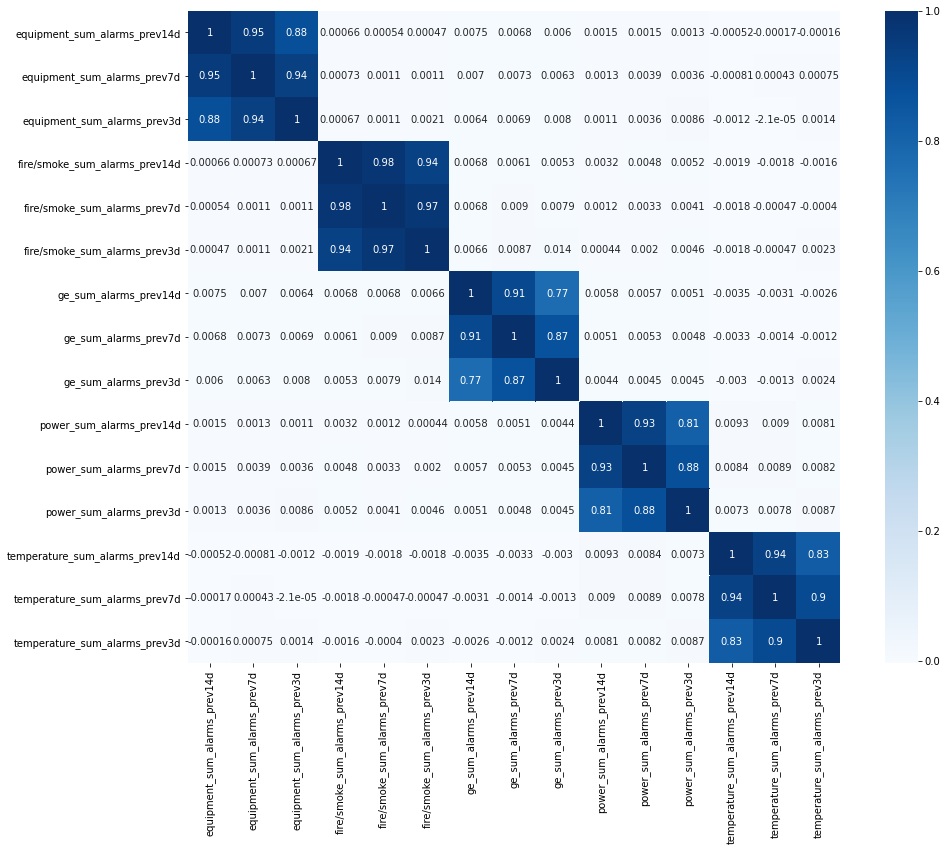

In [ ]:
plt.figure(figsize=(16,12));
sns.heatmap(df_sum_alarms.corr(), square=True, annot=True, cmap='Blues')

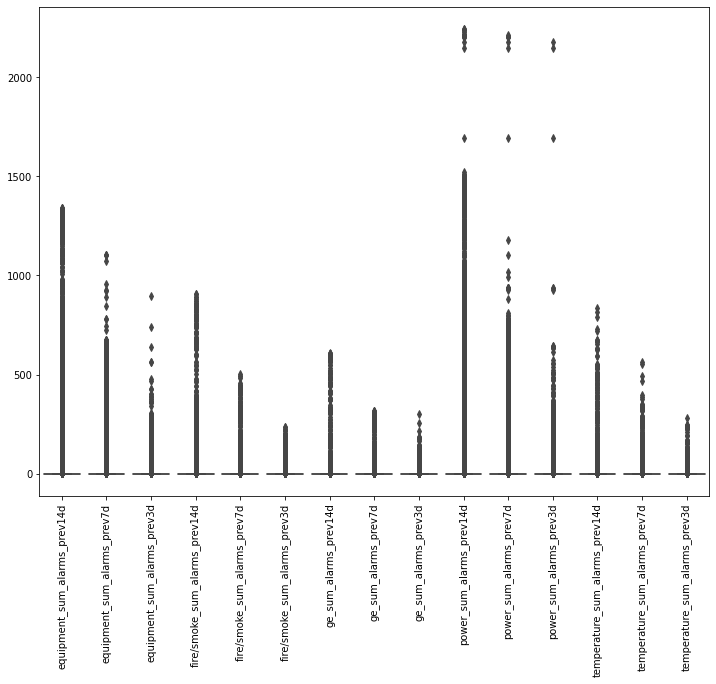

In [ ]:
#plt.figure(figsize=(12,9))
#sns.boxplot( data=df_sum_alarms);

plt.figure(figsize=(12,9));
ax = sns.boxplot(data=df_sum_alarms);
sns.set_palette("muted");
plt.setp(ax.get_xticklabels(), rotation=90);

We view the sum_alarms features grouped for site

In [ ]:
df_sum_alarms_and_site = df[np.union1d(['SITE_ID'],[col for col in df.columns if '_sum_alarms_' in col])]
df_sum_alarms_and_site_groupbysite=df_sum_alarms_and_site.groupby(['SITE_ID']).sum()
df_sum_alarms_and_site_groupbysite.head()

,equipment_sum_alarms_prev14d,equipment_sum_alarms_prev3d,equipment_sum_alarms_prev7d,fire/smoke_sum_alarms_prev14d,fire/smoke_sum_alarms_prev3d,fire/smoke_sum_alarms_prev7d,ge_sum_alarms_prev14d,ge_sum_alarms_prev3d,ge_sum_alarms_prev7d,power_sum_alarms_prev14d,power_sum_alarms_prev3d,power_sum_alarms_prev7d,temperature_sum_alarms_prev14d,temperature_sum_alarms_prev3d,temperature_sum_alarms_prev7d
SITE_ID,,,,,,,,,,,,,,,
0,882.0,189.0,441.0,42.0,9.0,21.0,827.0,180.0,417.0,1890.0,405.0,945.0,966.0,207.0,483.0
1,8277.0,1686.0,4004.0,14.0,3.0,7.0,0.0,0.0,0.0,168.0,36.0,84.0,28.0,6.0,14.0
2,24309.0,5487.0,12562.0,42.0,9.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,6.0,17.0
3,14.0,3.0,7.0,14.0,3.0,7.0,0.0,0.0,0.0,510.0,106.0,254.0,0.0,0.0,0.0
5,98.0,21.0,49.0,0.0,0.0,0.0,0.0,0.0,0.0,3143.0,663.0,1546.0,5754.0,1233.0,2877.0


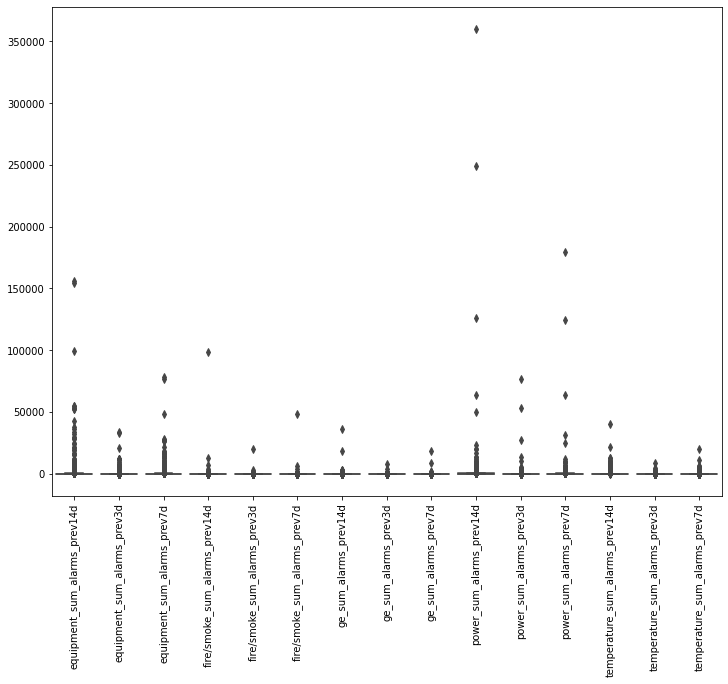

In [ ]:
plt.figure(figsize=(12,9))
ax = sns.boxplot(data=df_sum_alarms_and_site_groupbysite);
sns.set_palette("muted");
plt.setp(ax.get_xticklabels(), rotation=90);

We check the max point in the power_sum_alarms_prev14d features. We want to know if it is an outlier

In [ ]:
df_sum_alarms_and_site_groupbysite[df_sum_alarms_and_site_groupbysite['power_sum_alarms_prev14d']==df_sum_alarms_and_site_groupbysite['power_sum_alarms_prev14d'].max()]

,equipment_sum_alarms_prev14d,equipment_sum_alarms_prev3d,equipment_sum_alarms_prev7d,fire/smoke_sum_alarms_prev14d,fire/smoke_sum_alarms_prev3d,fire/smoke_sum_alarms_prev7d,ge_sum_alarms_prev14d,ge_sum_alarms_prev3d,ge_sum_alarms_prev7d,power_sum_alarms_prev14d,power_sum_alarms_prev3d,power_sum_alarms_prev7d,temperature_sum_alarms_prev14d,temperature_sum_alarms_prev3d,temperature_sum_alarms_prev7d
SITE_ID,,,,,,,,,,,,,,,
2113,1134.0,243.0,567.0,28.0,6.0,14.0,0.0,0.0,0.0,360003.0,76925.0,179602.0,14.0,3.0,7.0


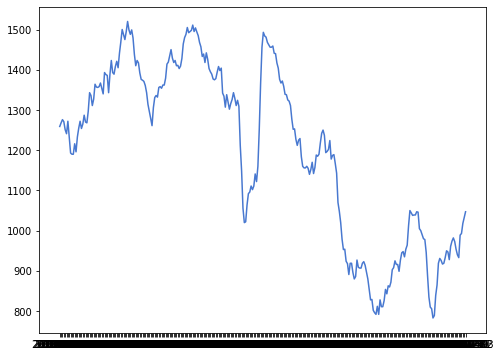

In [ ]:
plt.figure(figsize=(8,6));
plt.plot(df[df['SITE_ID']==2113]['DATE'], df[df['SITE_ID']==2113]['power_sum_alarms_prev14d'] )

We view the sum_alarms features grouped by date

In [ ]:
df_sum_alarms_and_date = df[np.union1d(['DATE'],[col for col in df.columns if '_sum_alarms_' in col])]
df_sum_alarms_and_date_groupbydate=df_sum_alarms_and_date.groupby(['DATE']).sum()
df_sum_alarms_and_date_groupbydate.head()

,equipment_sum_alarms_prev14d,equipment_sum_alarms_prev3d,equipment_sum_alarms_prev7d,fire/smoke_sum_alarms_prev14d,fire/smoke_sum_alarms_prev3d,fire/smoke_sum_alarms_prev7d,ge_sum_alarms_prev14d,ge_sum_alarms_prev3d,ge_sum_alarms_prev7d,power_sum_alarms_prev14d,power_sum_alarms_prev3d,power_sum_alarms_prev7d,temperature_sum_alarms_prev14d,temperature_sum_alarms_prev3d,temperature_sum_alarms_prev7d
DATE,,,,,,,,,,,,,,,
2019-04-10,4329.0,1023.0,2315.0,964.0,169.0,467.0,636.0,141.0,286.0,4910.0,953.0,2469.0,1676.0,454.0,801.0
2019-04-11,4480.0,1047.0,2418.0,971.0,232.0,495.0,645.0,194.0,309.0,4905.0,922.0,2529.0,1819.0,496.0,933.0
2019-04-12,4546.0,1085.0,2418.0,1007.0,292.0,515.0,658.0,174.0,322.0,4996.0,1063.0,2519.0,1827.0,476.0,943.0
2019-04-13,4578.0,1014.0,2345.0,1028.0,308.0,537.0,664.0,166.0,319.0,4994.0,1083.0,2435.0,1846.0,374.0,912.0
2019-04-14,4476.0,856.0,2263.0,1035.0,270.0,538.0,663.0,120.0,323.0,5010.0,1078.0,2394.0,1767.0,216.0,882.0


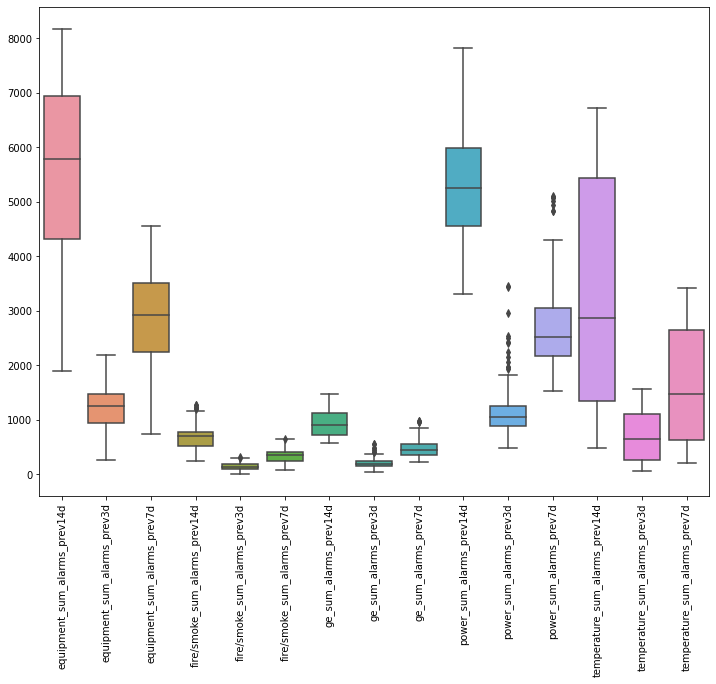

In [ ]:
plt.figure(figsize=(12,9))
#plt.setp(ax.get_xticklabels(), rotation=70)
#sns.boxplot( data=df_sum_alarms_and_date_groupbydate);

ax = sns.boxplot(data=df_sum_alarms_and_date_groupbydate);
sns.set_palette("muted");
plt.setp(ax.get_xticklabels(), rotation=90);

#PCA for sum alarms

In [ ]:
for alarm in cat:
  #normalizing data before PCA
  df_sum_alarm = df_sum_alarms[[col for col in df_sum_alarms.columns if alarm in col]]

  scaler = StandardScaler()
  scaler.fit(df_sum_alarm)
  normalize_data = scaler.transform(df_sum_alarm)

  pca = PCA(n_components=3)
  pca.fit(normalize_data)
  PCA_alarms = pca.transform(normalize_data)
  
  print('Values for ',alarm ,'alarm')
  print('Explained variance by 3 components = ', sum(pca.explained_variance_ratio_ *100))
  print('Explained variance by 2 components = ', np.cumsum(pca.explained_variance_ratio_ *100)[1])
  print('Explained variance by 1 components = ', np.cumsum(pca.explained_variance_ratio_ *100)[0])

Values for  equipment_ alarm
Explained variance by 3 components =  100.0
Explained variance by 2 components =  99.0078166460841
Explained variance by 1 components =  95.00221932603743
Values for  fire/smoke_ alarm
Explained variance by 3 components =  99.99999999999999
Explained variance by 2 components =  99.56673267338059
Explained variance by 1 components =  97.39700021184974
Values for  ge_ alarm
Explained variance by 3 components =  100.0
Explained variance by 2 components =  97.87534648081515
Explained variance by 1 components =  90.07496452681762
Values for  power_ alarm
Explained variance by 3 components =  99.99999999999999
Explained variance by 2 components =  98.17138839752461
Explained variance by 1 components =  91.75668057994444
Values for  temperature_ alarm
Explained variance by 3 components =  100.00000000000001
Explained variance by 2 components =  98.38050847906105
Explained variance by 1 components =  92.57355540475622



#SUM_ALARMS features by cluster

In [6]:
clusters = ['GEOGRAPHIC_CLUSTER_K_0','GEOGRAPHIC_CLUSTER_K_1','GEOGRAPHIC_CLUSTER_K_2','GEOGRAPHIC_CLUSTER_K_3','GEOGRAPHIC_CLUSTER_K_4','GEOGRAPHIC_CLUSTER_K_5','GEOGRAPHIC_CLUSTER_K_6','GEOGRAPHIC_CLUSTER_K_7','GEOGRAPHIC_CLUSTER_K_8', 'GEOGRAPHIC_CLUSTER_K_9']
temp = df[clusters]
df['cluster_class'] =  df[clusters].idxmax(1)

df_cluster_date_group = df.groupby(['cluster_class', 'DATE']).mean().reset_index()
df_cluster_date_group.head()

,cluster_class,DATE,SITE_ID,CELL_TYPE_Macro,CELL_TYPE_Mobil,CELL_TYPE_TRP,CELL_TYPE_Tx site,CELL_TYPE_micro,N_TRANSPORTED_SITES,GEOGRAPHIC_CLUSTER_K_0,GEOGRAPHIC_CLUSTER_K_1,GEOGRAPHIC_CLUSTER_K_2,GEOGRAPHIC_CLUSTER_K_3,GEOGRAPHIC_CLUSTER_K_4,GEOGRAPHIC_CLUSTER_K_5,GEOGRAPHIC_CLUSTER_K_6,GEOGRAPHIC_CLUSTER_K_7,GEOGRAPHIC_CLUSTER_K_8,GEOGRAPHIC_CLUSTER_K_9,aircon_sum_wo_prev7d,aircon_sum_wo_prev14d,aircon_sum_target_next14d,mean_temperature_prev7d,max_temperature_prev7d,min_temperature_prev7d,mean_temperature_prev3d,max_temperature_prev3d,min_temperature_prev3d,mean_rain_mm_prev7d,max_rain_mm_prev7d,min_rain_mm_prev7d,mean_rain_mm_prev3d,max_rain_mm_prev3d,min_rain_mm_prev3d,mean_humidity_prev7d,max_humidity_prev7d,min_humidity_prev7d,mean_humidity_prev3d,max_humidity_prev3d,min_humidity_prev3d,...,equipment_max_persistance_prev7d,equipment_mean_persistance_prev7d,equipment_min_persistance_prev7d,fire/smoke_max_persistance_prev7d,fire/smoke_mean_persistance_prev7d,fire/smoke_min_persistance_prev7d,ge_max_persistance_prev7d,ge_mean_persistance_prev7d,ge_min_persistance_prev7d,power_max_persistance_prev7d,power_mean_persistance_prev7d,power_min_persistance_prev7d,temperature_max_persistance_prev7d,temperature_mean_persistance_prev7d,temperature_min_persistance_prev7d,equipment_max_persistance_prev3d,equipment_mean_persistance_prev3d,equipment_min_persistance_prev3d,fire/smoke_max_persistance_prev3d,fire/smoke_mean_persistance_prev3d,fire/smoke_min_persistance_prev3d,ge_max_persistance_prev3d,ge_mean_persistance_prev3d,ge_min_persistance_prev3d,power_max_persistance_prev3d,power_mean_persistance_prev3d,power_min_persistance_prev3d,temperature_max_persistance_prev3d,temperature_mean_persistance_prev3d,temperature_min_persistance_prev3d,skew_equipment_alarms_prev14d,skew_fire/smoke_alarms_prev14d,skew_ge_alarms_prev14d,skew_power_alarms_prev14d,skew_temperature_alarms_prev14d,kurt_equipment_alarms_prev14d,kurt_fire/smoke_alarms_prev14d,kurt_ge_alarms_prev14d,kurt_power_alarms_prev14d,kurt_temperature_alarms_prev14d
0,GEOGRAPHIC_CLUSTER_K_0,2019-04-10,1305.74569,0.931034,0.00431,0.0,0.025862,0.030172,5.784483,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000,14.738491,16.823276,11.590517,16.352198,16.823276,16.008621,1.023578,4.798707,0.000000,1.874353,4.635776,0.003448,59.043060,71.754310,48.616379,64.633621,71.754310,58.521552,...,18.663793,3.533922,0.125000,0.038793,0.005517,0.0,1.896552,0.387284,0.0,21.310345,5.483966,0.142241,4.228448,1.680431,0.0,14.250000,5.000043,0.189655,0.012931,0.004310,0.0,0.689655,0.229914,0.000000,20.500000,7.166681,0.426724,4.228448,2.656595,1.681034,-0.005647,-0.000560,-0.000647,-0.008448,0.001638,-1.182974,-1.206830,-1.203849,-1.195308,-1.206439
1,GEOGRAPHIC_CLUSTER_K_0,2019-04-11,1305.74569,0.931034,0.00431,0.0,0.025862,0.030172,5.784483,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00431,0.00431,0.004310,15.471638,16.896552,12.840517,16.578621,16.879310,16.189655,1.346250,5.271552,0.001724,2.608405,5.084483,0.954741,61.750172,71.754310,52.767241,67.266724,71.754310,62.478448,...,18.517241,3.094181,0.129310,0.017241,0.003664,0.0,2.250000,0.434009,0.0,21.310345,5.546767,0.284483,4.922414,2.167500,0.0,2.125000,0.985603,0.193966,0.012931,0.007155,0.0,1.306034,0.446897,0.000000,20.077586,7.028707,0.426724,3.409483,2.383621,1.681034,-0.003793,0.000345,0.000948,-0.006034,0.002198,-1.175388,-1.206658,-1.206177,-1.199188,-1.209198
2,GEOGRAPHIC_CLUSTER_K_0,2019-04-12,1305.74569,0.931034,0.00431,0.0,0.025862,0.030172,5.784483,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00431,0.00431,0.008621,15.617974,16.896552,13.754310,15.699181,16.737069,13.862069,1.752802,6.929310,0.001724,3.631379,6.929310,1.111207,64.846422,75.120690,54.590517,71.424828,75.120690,67.568966,...,15.883621,2.543707,0.133621,0.017241,0.003664,0.0,2.250000,0.330000,0.0,21.318966,5.751164,0.284483,4.926724,2.168103,0.0,1.905172,0.834784,0.215517,0.008621,0.005733,0.0,0.844828,0.300302,0.012931,2.163793,1.390733,0.573276,3.413793,1.82

<Figure size 648x432 with 0 Axes>

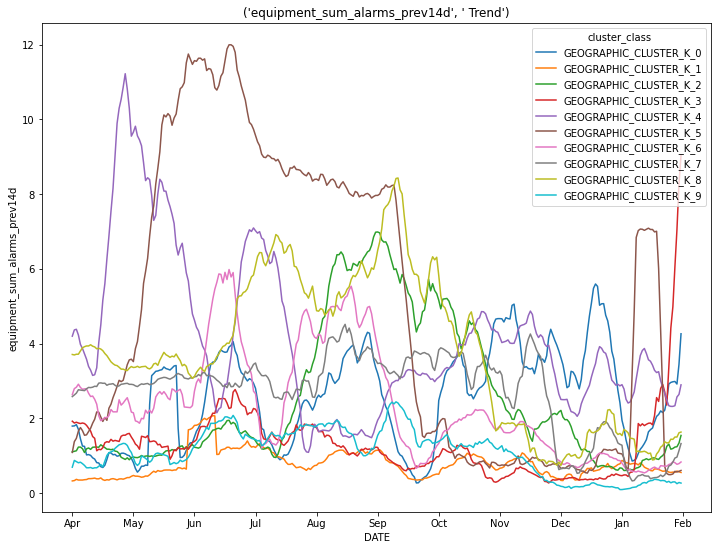

<Figure size 648x432 with 0 Axes>

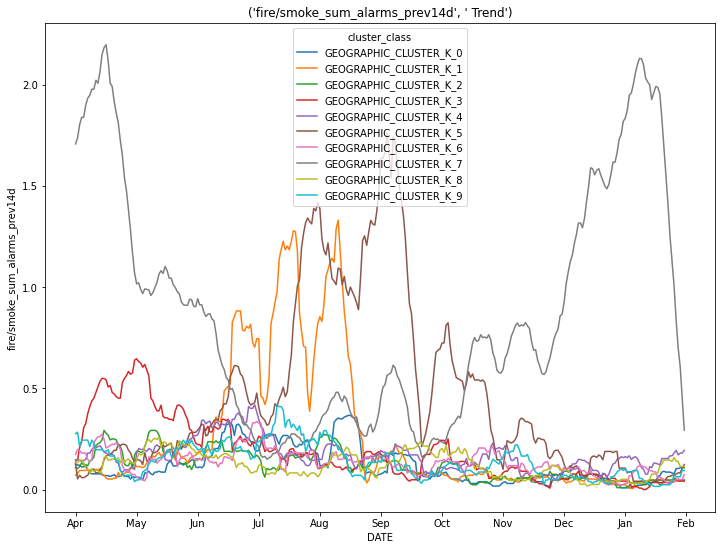

<Figure size 648x432 with 0 Axes>

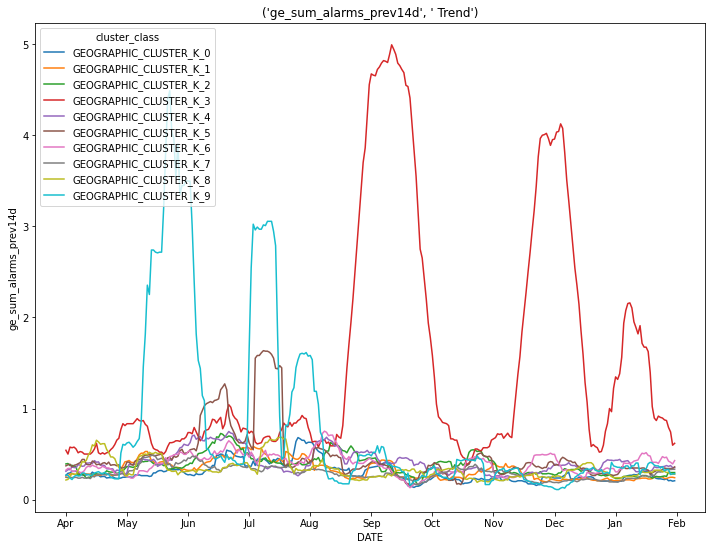

<Figure size 648x432 with 0 Axes>

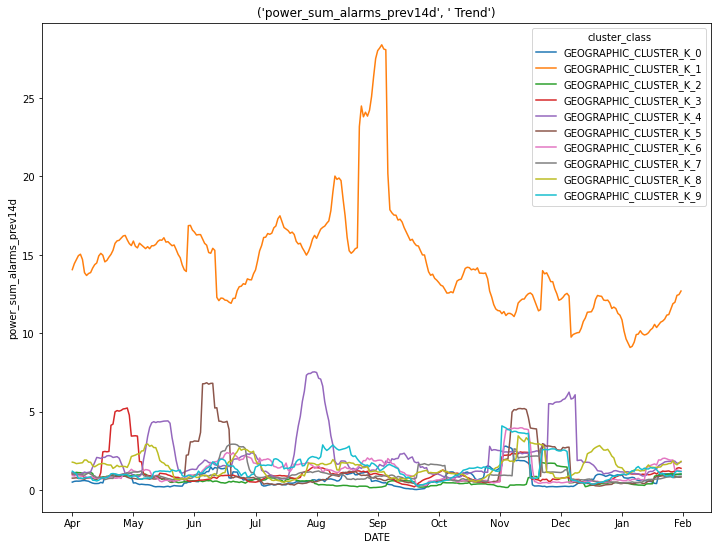

<Figure size 648x432 with 0 Axes>

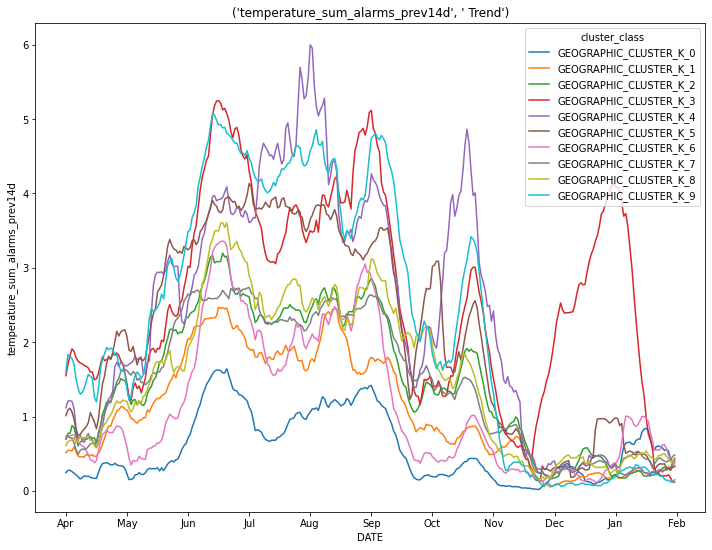

In [13]:
vars = ['equipment_sum_alarms_prev14d','fire/smoke_sum_alarms_prev14d','ge_sum_alarms_prev14d','power_sum_alarms_prev14d','temperature_sum_alarms_prev14d']

for var in vars:
  plt.figure(figsize=(9,6))
  f, ax1 = plt.subplots(figsize= (12,9), nrows=1);
  plt.xticks([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb']);
  sns.lineplot(data=df_cluster_date_group, x='DATE', y=var, hue='cluster_class').set(title=(var,' Trend'))

<Figure size 648x432 with 0 Axes>

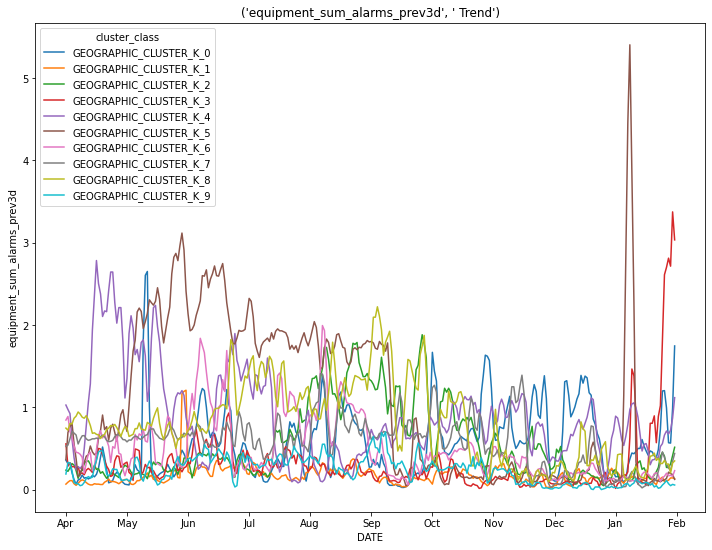

<Figure size 648x432 with 0 Axes>

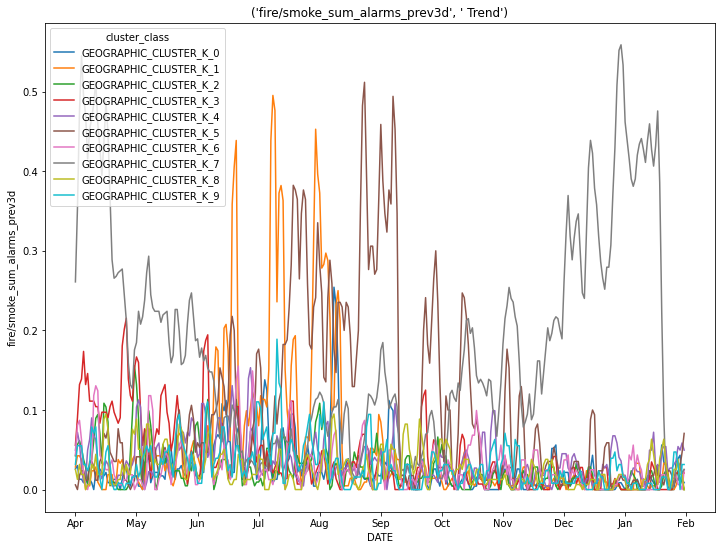

<Figure size 648x432 with 0 Axes>

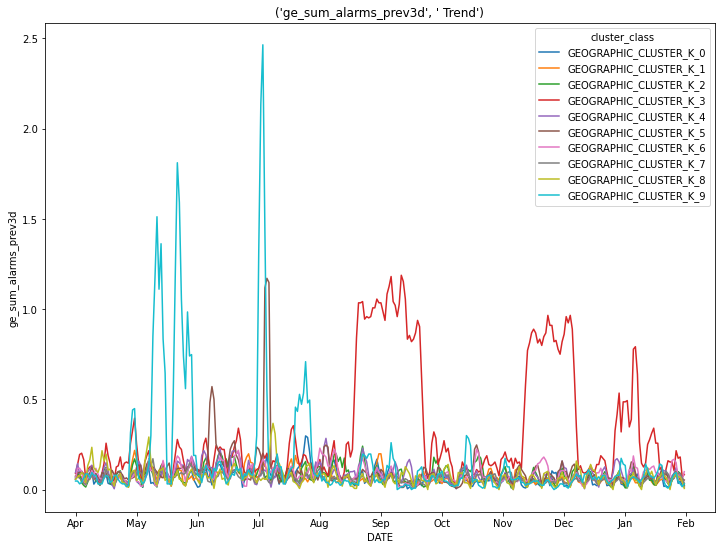

<Figure size 648x432 with 0 Axes>

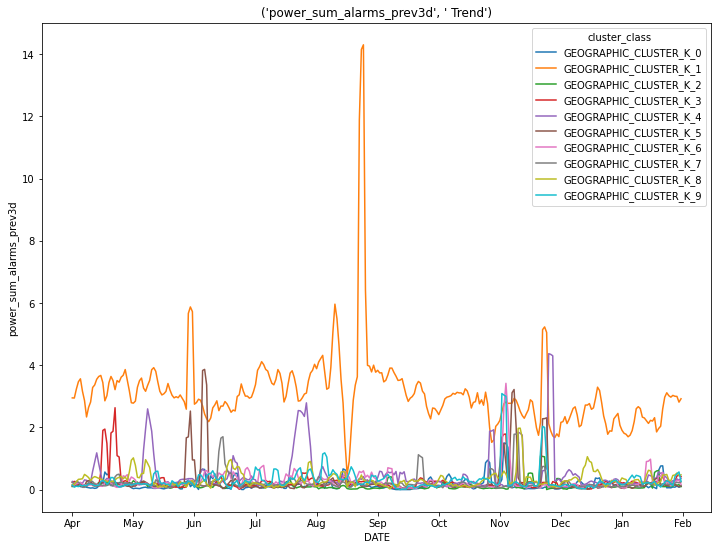

<Figure size 648x432 with 0 Axes>

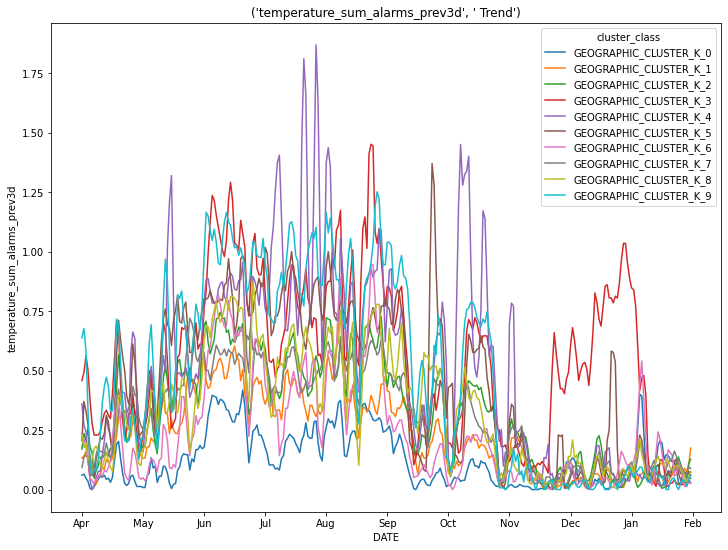

In [14]:
vars = ['equipment_sum_alarms_prev3d','fire/smoke_sum_alarms_prev3d','ge_sum_alarms_prev3d','power_sum_alarms_prev3d','temperature_sum_alarms_prev3d']

for var in vars:
  plt.figure(figsize=(9,6))
  f, ax1 = plt.subplots(figsize= (12,9), nrows=1);
  plt.xticks([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300], ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb']);
  sns.lineplot(data=df_cluster_date_group, x='DATE', y=var, hue='cluster_class').set(title=(var,' Trend'))